In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import model_selection

In [2]:
#Bu çalışmada veri seti üzerinde lasso regrsyon modelini inceleyeceğiz.
#Lasso regresyom modelinin amacı ridge ile aynıdır ve çalışma mantığı çok benzer.
#Hata kareler toplamını azaltmayı hedefler ve ridgeden farkı bazı değişken katsayılarını 0 yapabilir.
#Optimum lambda yı bulmak için yine lambda listemizi kullanarak cross val. karşılaştırması yapacağız.

In [3]:
#Veri ön işleme aşamalarını yapalım.
data=pd.read_csv("Hitters.csv")
df=data.copy()
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [4]:
#Modeli kuralım.
lasso=Lasso(alpha=0.1).fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  positive)


In [5]:
#Modelin sabiti.
lasso.intercept_

-7.7694903740984955

In [6]:
#Değişkenlerin katsayıları.
lasso.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247805.522216806, tolerance: 3898.686956380658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247772.261812302, tolerance: 3898.686956380658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8247747.060921359, tolerance: 3898.686956380658
  positive)


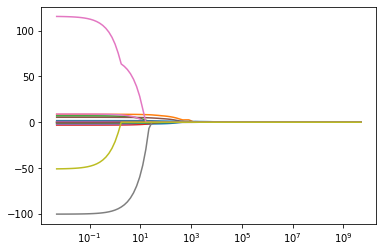

In [7]:
#Lambdanın katsayılar üzerindeki etkisini görmek için bir işlem yapalım.
#İçerisinde 100 tane lambda bulunan bir liste oluşturalım.
#Bu lambdaları kullanarak lasso regresyon modeli oluşturalım ve çıkan katsayıları bir listeye atalım.

lambdalar=10**np.linspace(10,-2,100)*0.5

lasso2=Lasso()
katsayılar=[]

for i in lambdalar:
    lasso2.set_params(alpha=i)
    lasso2.fit(x_train,y_train)
    katsayılar.append(lasso2.coef_)
    
ax=plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")
#Grafikte her renk bir değişkenin katsayısını ifade etmektedir.
#Görüldüğü gibi lambda değeri arttıkça değişkenlere uygulanan ceza arttığı için değişkenler 0 a yaklaşıyor ve
#belli bir değerden sonra 0 oluyor.

In [8]:
y_pred=lasso.predict(x_test)
y_pred[:5]

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127])

In [9]:
"Test hatası:",np.sqrt(mean_squared_error(y_test,y_pred))

('Test hatası:', 356.7545270148768)

In [10]:
y_pred_series=pd.Series(y_pred,index=y_test.index)

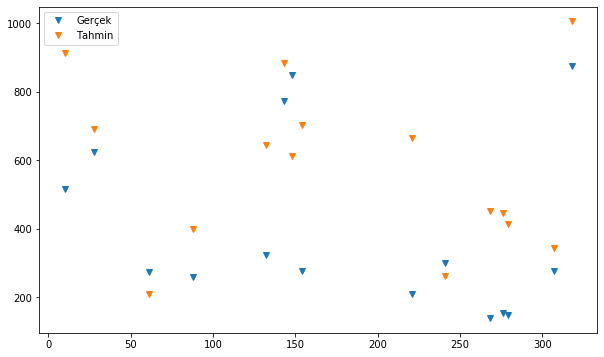

In [11]:
plt.figure(figsize=(10,6))
plt.plot(y_test[:15],"v")
plt.plot(y_pred_series[:15],"v")
plt.legend(["Gerçek","Tahmin"]);

In [12]:
from sklearn.linear_model import LassoCV

In [13]:
#Ridge modelinde olduğu gibi lasso modelinde de tuning için fonksiyon var.
#Bu sefer lambdaları vermek yerine modeldeki öntanımlı lambdadan başlatıp lambdayı modelin ayarlamasına bıraktık.
lasso_cv=LassoCV(alphas=None,cv=10,max_iter=5000,normalize=True).fit(x_train,y_train)

In [14]:
#Modelin optimum lambda olarak belirlediği lambda.
lasso_cv.alpha_

0.39406126432470073

In [15]:
#Optimum lambda ile modeli tekrar kuralım.
lasso_tuned=Lasso(alpha=lasso_cv.alpha_).fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  positive)


In [16]:
y_pred_tuned=lasso_tuned.predict(x_test)

In [17]:
y_pred_tuned[:10]

array([ 612.35137732,  700.33250549, 1006.70519014,  413.47629461,
        402.48498299,  344.6806372 ,  663.99573427,  452.04136986,
        914.42452018,  645.41287468])

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred_tuned))

356.5226376958367

In [19]:
y_pred_tuned=pd.Series(y_pred_tuned,index=y_test.index)

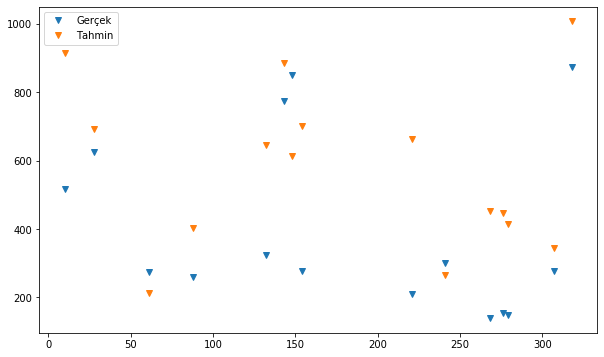

In [20]:
plt.figure(figsize=(10,6))
plt.plot(y_test[:15],"v")
plt.plot(y_pred_tuned[:15],"v")
plt.legend(["Gerçek","Tahmin"]);